# Imports

In [1]:
# Configs
%load_ext autoreload
%autoreload 3
## other standard packages
import sys
## Env variables and preparation stuffs
sys.path.insert(0, "../")
from src_code.data_utils.dataset import GridDataset
from src_code.data_utils.dataset_utils import CellType, draw_image_grid
from src_code.data_utils.prompt_utils import prompt_generator

# Dataset
class CellType(Enum):

    FREE_CELL = 1  # Represents free space
    WALL = 2       # Represens a wall
    START = 3      # Represents the start position
    GOAL = 4       # Represents the goal position

In [2]:
# cell size in the size of the grid measured in pixels
dataset = GridDataset(grid_size=5, seed = 42, wall_symbol="#", free_symbol=".", cell_size=10)
img_rgb1, grid_world1 = dataset[0]
img_rgb2, grid_world2 = dataset[1]

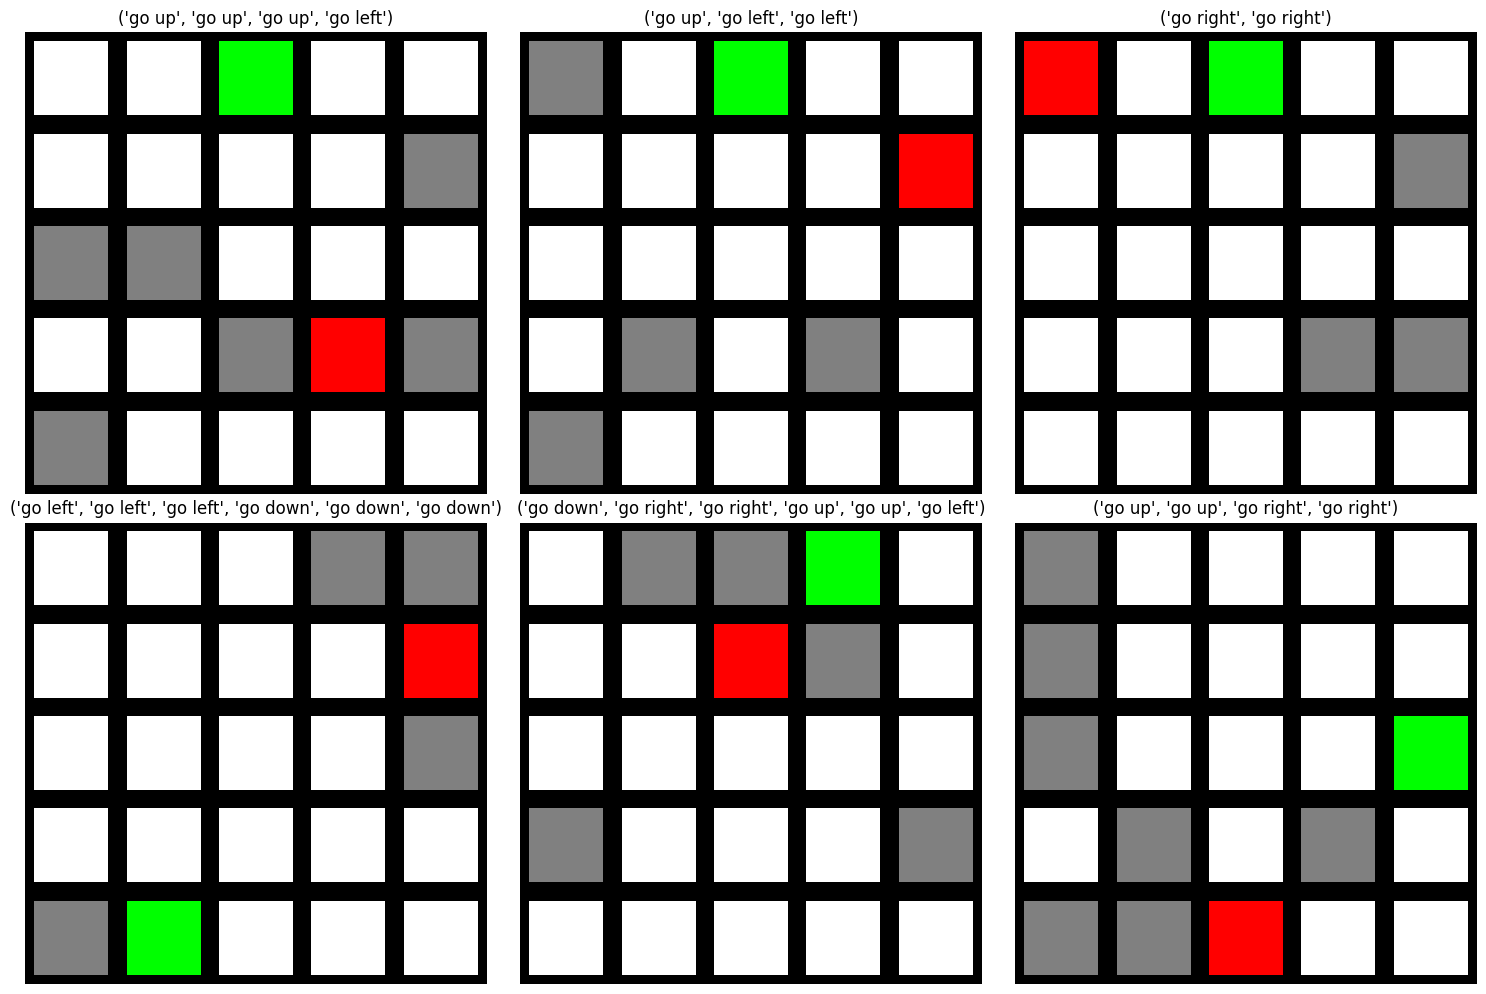

In [3]:
num_images = 6
img_title_pairs = [(dataset[i][0], f"{dataset[i][1].a_star()}") for i in range(num_images)]
draw_image_grid(img_title_pairs)

In [4]:
print(str(grid_world2))

# . . . . 
# . . . . 
# . . . G 
. # . # . 
# # S . . 



# Prompt

In [5]:
print(prompt_generator(grid_world2, img=img_rgb2, img_symbol="<image>"))

<image> is an image of a grid world

The red cell is the starting cell,
the green cell is the goal cell,
the gray cells are obstacles,
and the white cells are free cells.

Rules:
The grid size is 5x5
The path must not pass through the obstacles.
You can move up, down, left, or right from one cell to another.
You cannot move diagonally.
The path must be the shortest path from the starting cell to the goal cell.
The output should be a sequence of steps to reach the goal cell.
Output the steps only, don't give me reason.

Actions:
Only give me the steps, like 'go up', 'go down', 'go left' or 'go right'
go up: move one cell up
go down: move one cell down
go left: move one cell left
go right: move one cell right

Output example:
('go up', 'go right', 'go right', 'go down', 'go right')

Can you find the path from the starting cell to the goal cell?



In [6]:
print(prompt_generator(grid_world2))

Here is the grid world:
# . . . . 
# . . . . 
# . . . G 
. # . # . 
# # S . . 

The S cell is the starting cell,
the G cell is the goal cell,
the # cells are obstacles,
and the . cells are free cells.

Rules:
The grid size is 5x5
The path must not pass through the obstacles.
You can move up, down, left, or right from one cell to another.
You cannot move diagonally.
The path must be the shortest path from the starting cell to the goal cell.
The output should be a sequence of steps to reach the goal cell.
Output the steps only, don't give me reason.

Actions:
Only give me the steps, like 'go up', 'go down', 'go left' or 'go right'
go up: move one cell up
go down: move one cell down
go left: move one cell left
go right: move one cell right

Output example:
('go up', 'go right', 'go right', 'go down', 'go right')

Can you find the path from the starting cell to the goal cell?



# Images for the paper

In [7]:
dataset = GridDataset(grid_size=5, seed = 42, wall_symbol="#", free_symbol=".", cell_size=50)
img_rgb5, grid_world5 = dataset[5]

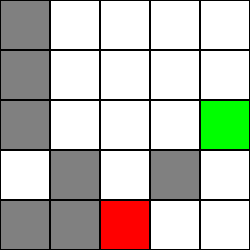

In [8]:
img_rgb5

In [9]:
print(str(grid_world5))

# . . . . 
# . . . . 
# . . . G 
. # . # . 
# # S . . 



In [10]:
grid_world5.a_star()

('go up', 'go up', 'go right', 'go right')

In [11]:
print(prompt_generator(grid_world5, pure_language=False, img=None))

Here is the grid world:
# . . . . 
# . . . . 
# . . . G 
. # . # . 
# # S . . 

The S cell is the starting cell,
the G cell is the goal cell,
the # cells are obstacles,
and the . cells are free cells.

Rules:
The grid size is 5x5
The path must not pass through the obstacles.
You can move up, down, left, or right from one cell to another.
You cannot move diagonally.
The path must be the shortest path from the starting cell to the goal cell.
The output should be a sequence of steps to reach the goal cell.
Output the steps only, don't give me reason.

Actions:
Only give me the steps, like 'go up', 'go down', 'go left' or 'go right'
go up: move one cell up
go down: move one cell down
go left: move one cell left
go right: move one cell right

Output example:
('go up', 'go right', 'go right', 'go down', 'go right')

Can you find the path from the starting cell to the goal cell?



In [ ]:
# Please install OpenAI SDK first: `pip3 install openai`
from openai import OpenAI

client = OpenAI(api_key="<api_key>", base_url="https://api.deepseek.com")

response = client.chat.completions.create(
    model="deepseek-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant"},
        {"role": "user", "content": "Hello"},
    ],
    stream=False
)

print(response.choices[0].message.content)

Hello! How can I assist you today? 😊


In [13]:
num_points = 100
with open("deep_seek_outputs_ascii.txt", "w") as f0:
    for i in range(num_points):
        img_rgb, grid_world = dataset[i]
        prompt = prompt_generator(grid_world, pure_language=False, img=None)
        response = client.chat.completions.create(
        model="deepseek-chat",
        messages=[
            {"role": "system", "content": "You are a helpful assistant"},
            {"role": "user", "content": f"{prompt}"},
        ],
        stream=False)
        ans = response.choices[0].message.content
        f0.write( ans + "search term \n")
        print(f"response={i} {ans}")


response=0 ('go up', 'go right', 'go right', 'go up', 'go up', 'go right')
response=1 ('go up', 'go right', 'go right', 'go up', 'go right', 'go up')
response=2 ('go right', 'go right', 'go up', 'go up', 'go up')
response=3 ('go up', 'go left', 'go left', 'go left', 'go down', 'go down')
response=4 ('go up', 'go right', 'go right', 'go up')
response=5 ('go right', 'go up', 'go up', 'go right', 'go right', 'go down')
response=6 ('go up', 'go up', 'go right', 'go right', 'go down', 'go down')
response=7 ('go right', 'go up', 'go right', 'go down', 'go down', 'go right')
response=8 ('go right', 'go down', 'go down', 'go left')
response=9 ('go up', 'go right', 'go up', 'go right', 'go up')
response=10 ('go up', 'go right', 'go up', 'go right', 'go right', 'go down')
response=11 ('go up', 'go right', 'go up', 'go right', 'go down', 'go down')
response=12 ('go up', 'go right', 'go up', 'go right', 'go down', 'go down')
response=13 ('go up', 'go right', 'go up')
response=14 ('go down', 'go le